In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Poisson recap
A *Poisson process* is any process where the timing of each event is independent of the timing of previous events, and where an average number of events happen in a set time frame.

Examples of Poisson processes are bus arrivals, meteor strikes, and natural births at a hospital.

The Poisson distribution is the limit of the binomial distribution for large N.

The `np.random.poisson(lam, size)` function allows us to sample from a Poisson distribution. The `size` parameter allows us to sample multiple times. The `lambda` parameter is the expected separation between events.

In [12]:
samples = np.random.poisson(10, size=10000)

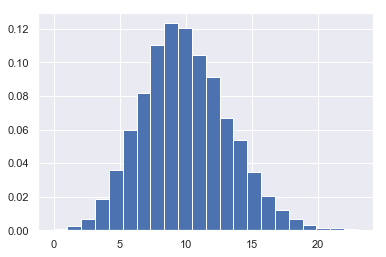

In [13]:
_ = plt.hist(samples, bins=22, density=True)

What is the probability of the next event happening in 5 time units or less?

In [14]:
sum(samples <= 5)/len(samples)

0.0674

## Function to graph Poisson sampling
Let's graph each value on it's own now, rather than binning them in a histogram.

In [2]:
def plot_poisson(lam, size, plot_kind='line'):
    samples = np.random.poisson(lam, size)
    samples_df = pd.DataFrame(samples, columns=["samples"])
    counts = samples_df["samples"].value_counts()
    counts = counts.sort_index()
    _ = counts.plot(kind=plot_kind)
    _ = plt.ylabel('value counts')
    
    return True

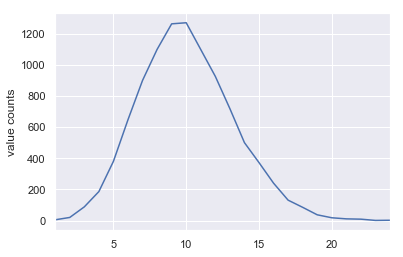

In [16]:
_ = plot_poisson(10, 10000)

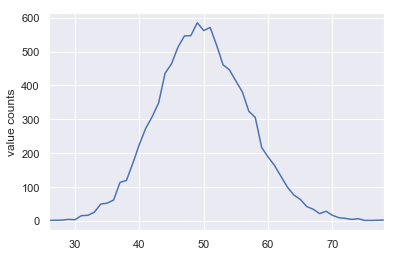

In [17]:
_ = plot_poisson(50, 10000)

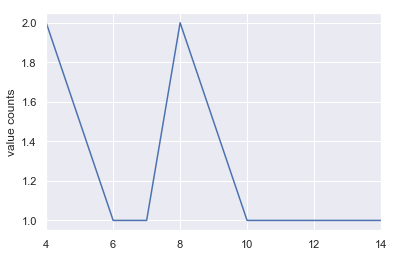

In [18]:
_ = plot_poisson(10, 10)

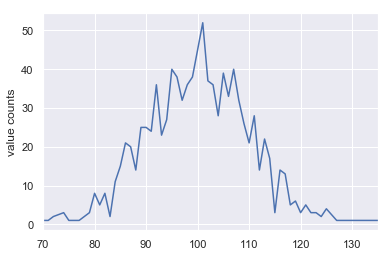

In [19]:
_ = plot_poisson(100, 1000)

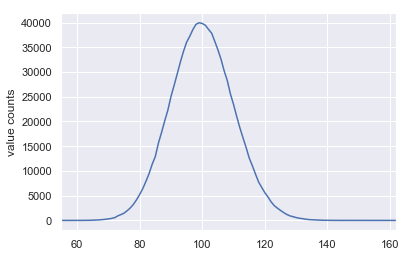

In [20]:
_ = plot_poisson(100, 1000000)

Let's see if we can figure out what it means for the Poisson distribution to be the limit of the binomial distribution for a low probability of success and large number of trials.

In [3]:
def plot_binomial(n, p, size, plot_kind='line'):
    samples = np.random.binomial(n, p, size)
    samples_df = pd.DataFrame(samples, columns=["samples"])
    counts = samples_df["samples"].value_counts()
    counts = counts.sort_index()
    _ = counts.plot(kind=plot_kind)
    _ = plt.ylabel('value counts')
    
    return True

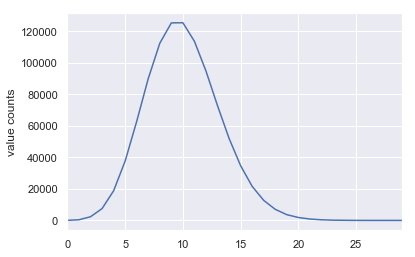

In [9]:
_ = plot_binomial(100000, 0.0001, 1000000)

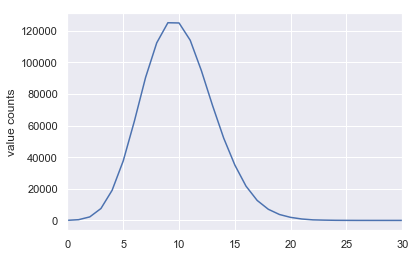

In [10]:
_ = plot_poisson(10, 1000000)

There it is! It turns out `lambda` equals `n * p`, for large `n` and small `p`.